### Load in imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load all the CSV's generated from training

In [2]:

#  Birth: 2023-06-30 03:49:59.711536480 +0200

df_initial = pd.read_csv("/home/afrodisiac/code/FloodNCA/intital_screening_training_outputs/evaluations.csv")


#Birth: 2023-06-30 11:52:53.973944633 +0200
df_lr_epoch = pd.read_csv("lr_epochs_screening_training_outputs/evaluations.csv")


#Birth: 2023-06-30 16:46:39.129523673 +0200
df_weights_shuffle = pd.read_csv("find_weights_training_outputs/evaluations.csv")


df_rain_mask = pd.read_csv("rain_mask_normal_training_outputs/evaluations.csv")


df_inception_initial = pd.read_csv("inception_training_outputs/evaluations.csv")


df_reassurance_of_loss = pd.read_csv("training_outputs/evaluations.csv")

df_list = [ df_initial, df_lr_epoch, 
            df_weights_shuffle, df_rain_mask,
            df_inception_initial]
df_concat = pd.concat(df_list, ignore_index=True)
df_concat.head()
df_concat.to_csv("raw_data.csv", index=False)

In [3]:
worst_model_indx = df_concat['model_mae'].idxmax()
best_model_indx = df_concat['model_mae'].idxmin()

print(df_concat.loc[best_model_indx])

name                  medium_incep_train_5_custom_mae_weighted_9_nor...
heuristic_mae                                                  0.000787
benchmark1_mae                                                 0.001166
benchmark2_mae                                                 0.001064
model_mae                                                      0.000632
residual_model_mae                                             0.001418
Name: 167, dtype: object


In [4]:
df_initial.head()

,name,heuristic_mae,benchmark1_mae,benchmark2_mae,model_mae,residual_model_mae
0,initial_test_model_train_1_mse_un_normed_26,0.002279,0.177068,0.065507,0.001805,0.013106
1,initial_test_model_train_1_mae_un_normed_26,0.002279,0.034373,0.192391,0.001209,0.010826
2,initial_test_model_train_1_mse_auto_un_normed_26,0.002279,0.092834,0.146148,0.001641,0.012190
3,initial_test_model_train_1_mae_auto_un_normed_26,0.002279,0.041047,0.073802,0.001265,0.011474
4,initial_test_model_train_1_mse_weighted_un_nor...,0.002279,0.049468,0.102216,0.001322,0.011021


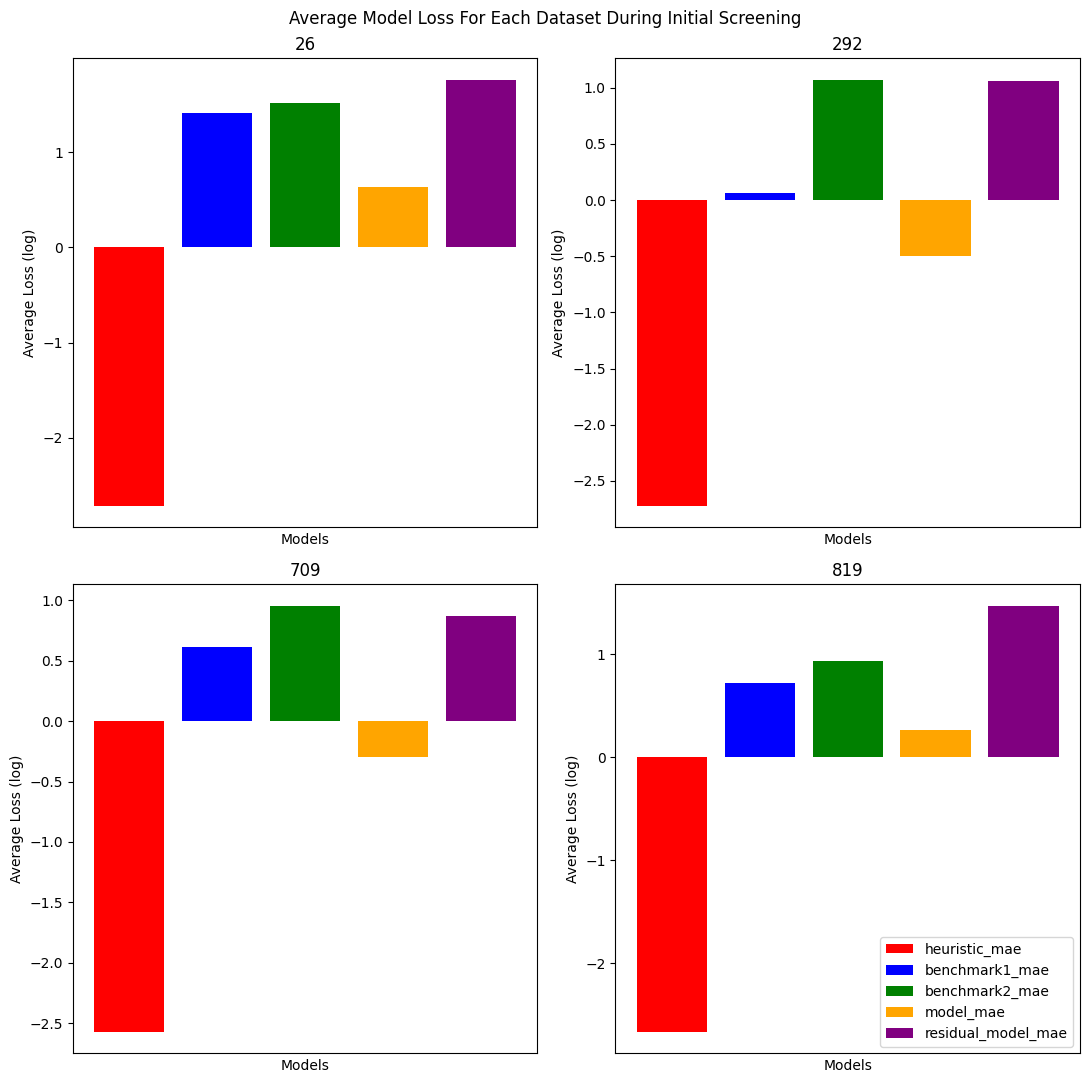

In [5]:
df_initial_26 = df_initial[df_initial['name'].str.contains("26")]
df_initial_292 = df_initial[df_initial['name'].str.contains("292")]
df_initial_709 = df_initial[df_initial['name'].str.contains("709")]
df_initial_819 = df_initial[df_initial['name'].str.contains("819")]

df_initial_dems = [df_initial_26 ,df_initial_292, df_initial_709, df_initial_819]

plt.figure(figsize=(11, 11))
plt.suptitle("Average Model Loss For Each Dataset During Initial Screening")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([1, 2, 3, 4], df_initial_dems, ['26', '292', '709', '819']):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(2, 2, i)
    bars = plt.bar(column_names, np.log10(mean_values), color=colors)
    bars_list.extend(bars)
    plt.ylabel("Average Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    # Rotate x-labels for better readability
    plt.xticks([])
plt.legend(bars_list, legend_labels, loc='best') #, bbox_to_anchor=(1, 0.5))

plt.tight_layout()



### DEM 292  Was found to be the best so we move forward with this

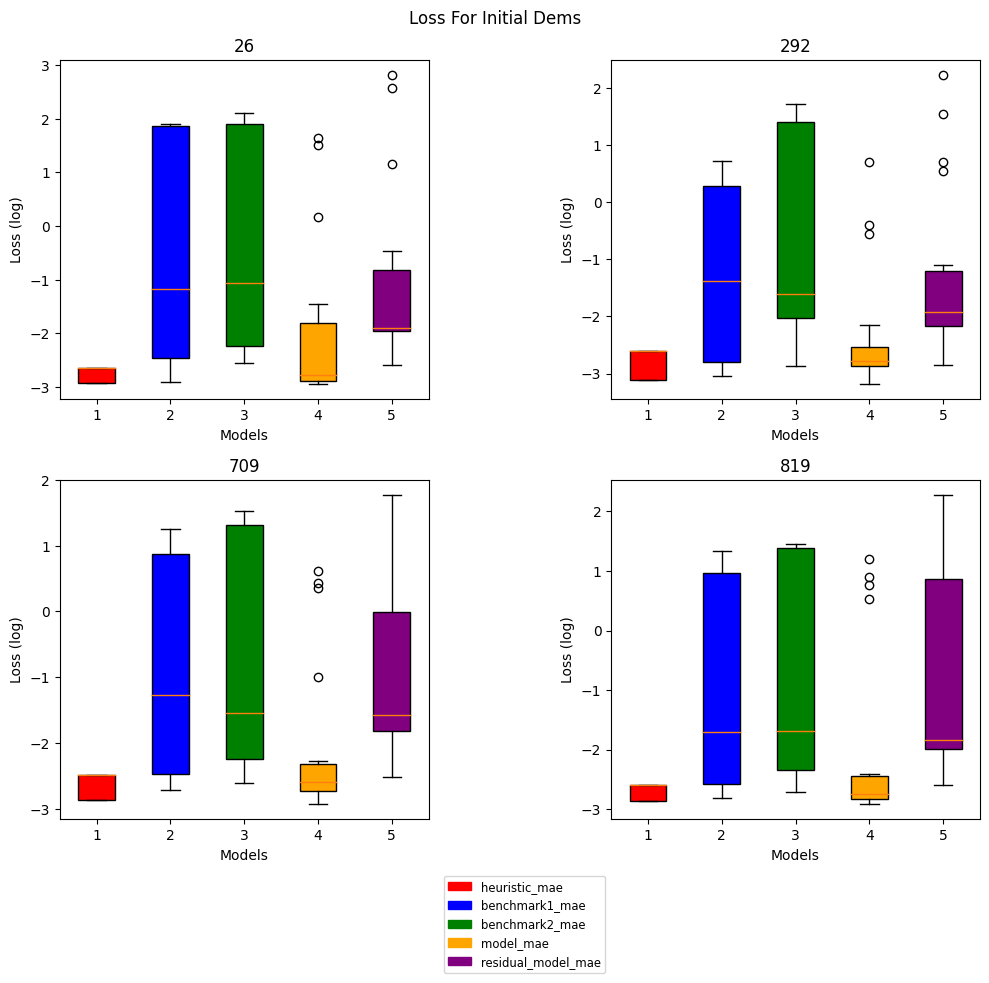

In [6]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
df_initial_dems = [df_initial_26 ,df_initial_292, df_initial_709, df_initial_819]
column_names = df_initial.columns[1:]

plt.figure(figsize=(10, 10))
plt.suptitle("Loss For Initial Dems")

for df, i, name in zip(df_initial_dems, [i for i in range(1, len(df_initial_dems)+1)], ['26', '292', '709', '819']):
    plt.subplot(2, 2, i)
    df_logged = np.log10(df[column_names])

    box_plt = plt.boxplot(df_logged, patch_artist=True)
    for patch, color in zip(box_plt['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(name)
    plt.xlabel("Models")
    plt.ylabel("Loss (log)")
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))
plt.tight_layout()

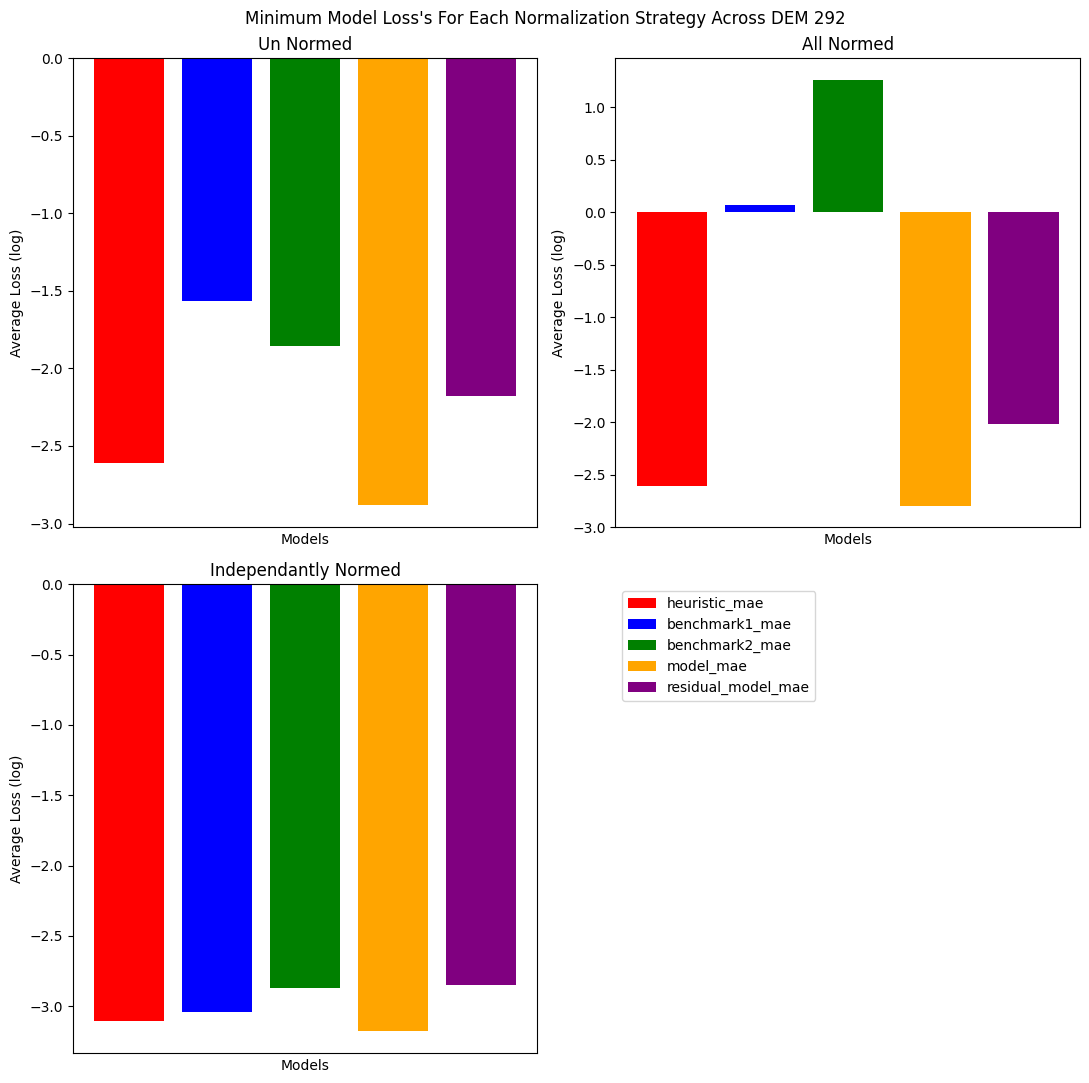

In [7]:

df_raw_292=    df_initial_292[df_initial_292['name'].str.contains("un_normed_")]
df_all_292 =   df_initial_292[df_initial_292['name'].str.contains("all_normed_equal_")]
df_indep_292 = df_initial_292[df_initial_292['name'].str.contains("norm_independant")]


df_normed_292_list= [df_raw_292, df_all_292, df_indep_292]


plt.figure(figsize=(11, 11))
plt.suptitle("Minimum Model Loss's For Each Normalization Strategy Across DEM 292")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([1, 2, 3], df_normed_292_list, ['Un Normed', 'All Normed', 'Independantly Normed',]):

    mean_values = [df[column].min() for column in column_names]
    plt.subplot(2, 2, i)
    bars = plt.bar(column_names, np.log10(mean_values), color=colors)
    bars_list.extend(bars)
    plt.ylabel("Average Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    # Rotate x-labels for better readability
    plt.xticks([])
ax= plt.subplot(2,2,4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend(bars_list, legend_labels, loc='upper left') #, bbox_to_anchor=(1, 0.5))
plt.tight_layout()

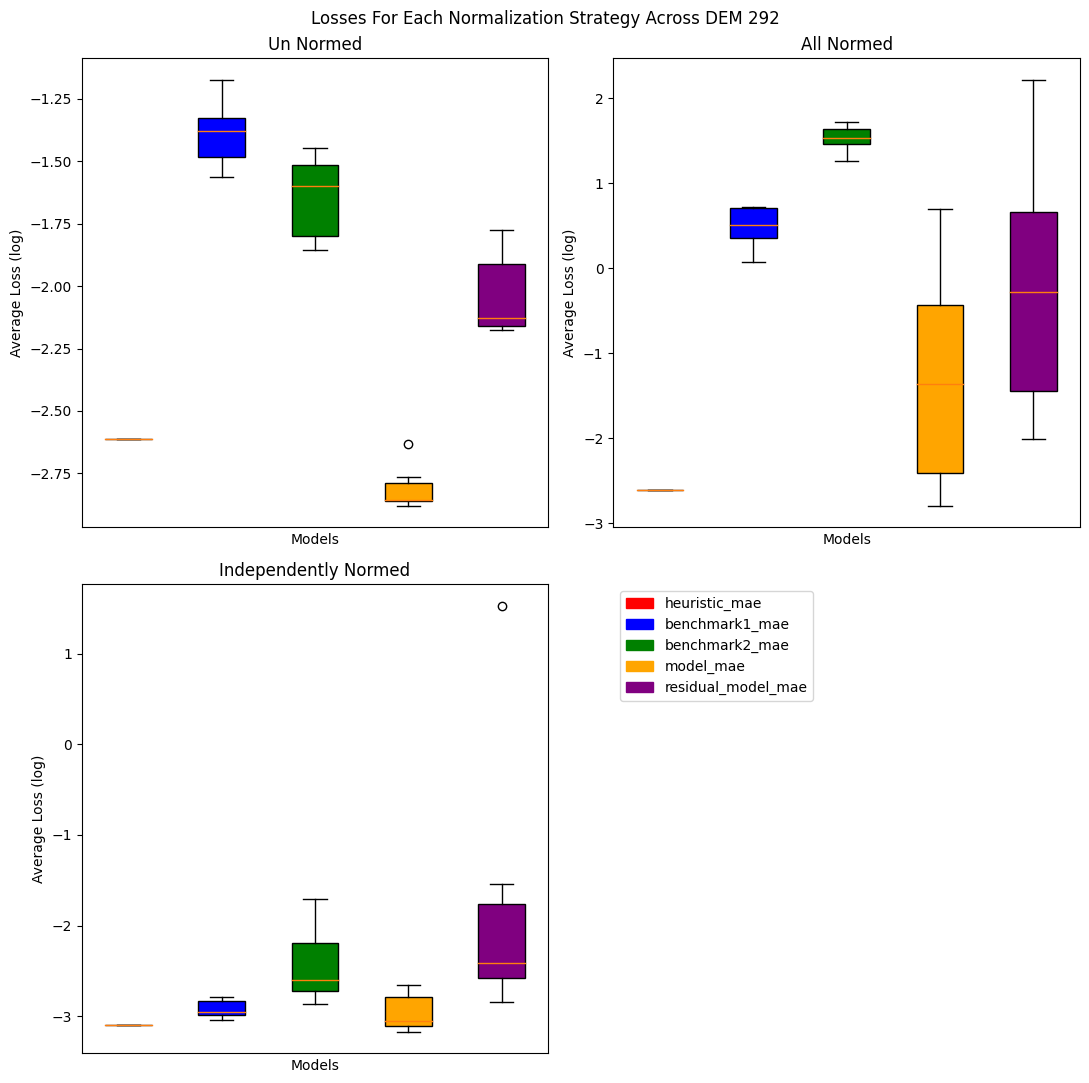

In [8]:
df_raw_292 = df_initial_292[df_initial_292['name'].str.contains("un_normed_")]
df_all_292 = df_initial_292[df_initial_292['name'].str.contains("all_normed_equal_")]
df_indep_292 = df_initial_292[df_initial_292['name'].str.contains("norm_independant")]

df_normed_292_list = [df_raw_292, df_all_292, df_indep_292]

plt.figure(figsize=(11, 11))
plt.suptitle("Losses For Each Normalization Strategy Across DEM 292")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2, 3], df_normed_292_list, ['Un Normed', 'All Normed', 'Independently Normed']):
    df_logged = np.log10(df[column_names])
    plt.subplot(2, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Average Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Remove spines and ticks from the empty subplot
ax = plt.subplot(2, 2, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, legend_labels, loc='upper left')

plt.tight_layout()

### We move forward with independantly normalized; a caveat that we should have looked at the Mean...

In [9]:
names = ['MSE', 'MAE', 'MSE AUTO', 'MAE AUTO', 'MSE MANUEL', 'MAE MANUEL']
nice_error_df = df_indep_292.copy()
nice_error_df['name'] = names

latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Final Results For Loss Functions Across DEM 292', label='tab:sample',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{Final Results For Loss Functions Across DEM 292}
\label{tab:sample}
\begin{tabular}{p{2cm}ccccc}
\toprule
      name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
       MSE &       0.000787 &        0.000914 &        0.002026 &   0.002225 &            0.028407 \\
       MAE &       0.000787 &        0.001607 &        0.003056 &   0.000893 &            0.004070 \\
  MSE AUTO &       0.000787 &        0.001145 &        0.019667 &   0.001983 &           34.082030 \\
  MAE AUTO &       0.000787 &        0.001093 &        0.001836 &   0.000866 &            0.003725 \\
MSE MANUEL &       0.000787 &        0.001633 &        0.001352 &   0.000740 &            0.002307 \\
MAE MANUEL &       0.000787 &        0.000994 &        0.008186 &   0.000665 &            0.001413 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/637568520.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',


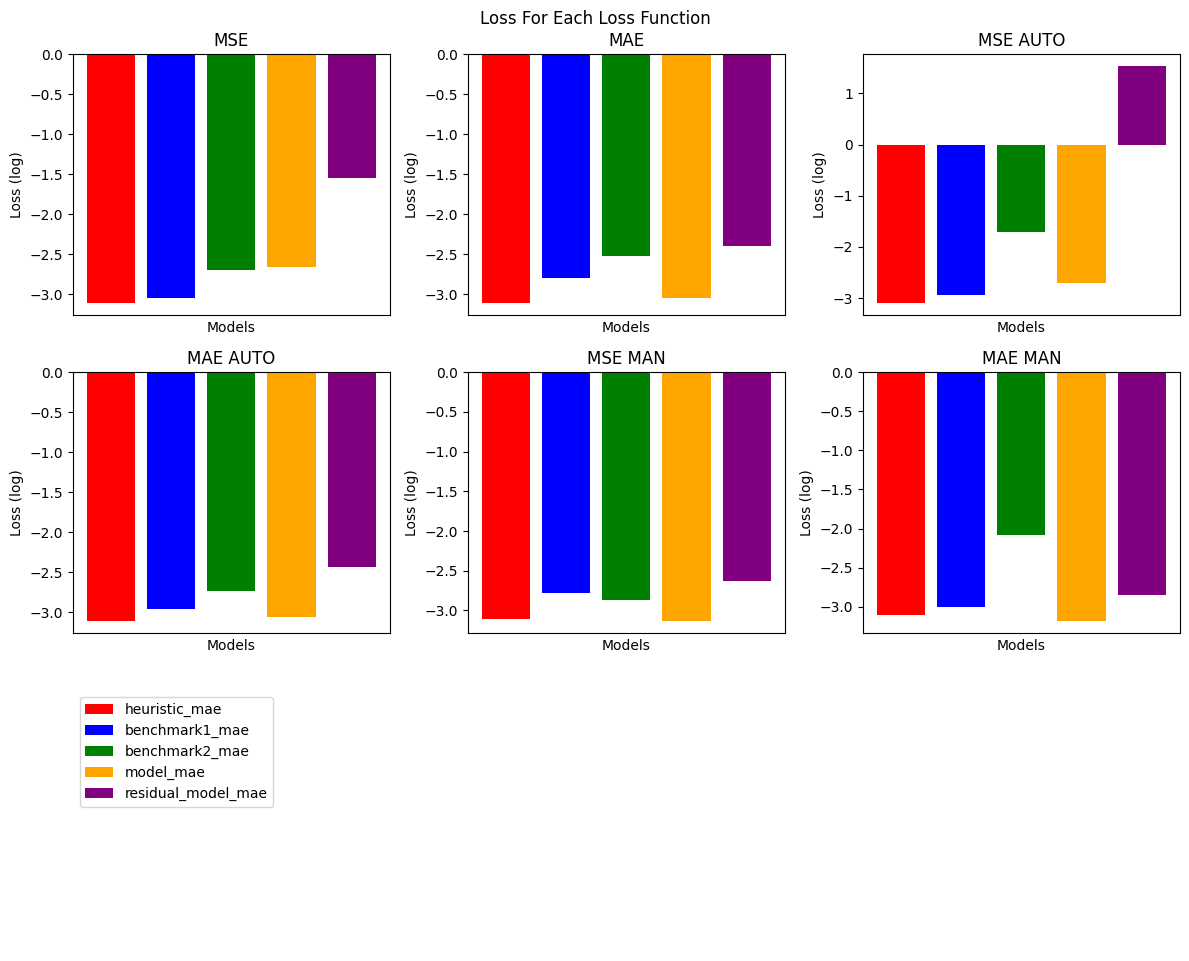

In [10]:

df_indep_errors_list = []
error_list = ['_mse_norm_', '_mae_norm_','_mse_auto', '_mae_auto', '_mse_weighted', "_mae_weighted"]

for er in error_list:
    df_indep_errors_list.append(df_indep_292[df_indep_292['name'].str.contains(er)])


plt.figure(figsize=(12, 13))
plt.suptitle("Loss For Each Loss Function")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, len(error_list)+1)], df_indep_errors_list, ['MSE', 'MAE', 'MSE AUTO', 'MAE AUTO', 'MSE MAN', 'MAE MAN']):

    mean_values = [df[column].max() for column in column_names]
    plt.subplot(4, 3, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)

    plt.xticks([])

ax= plt.subplot(4,3,7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()

### Determining best learning rate and epoch count with added complexity And differences

#### Which is better, predicting water difference or predicting direct water values?

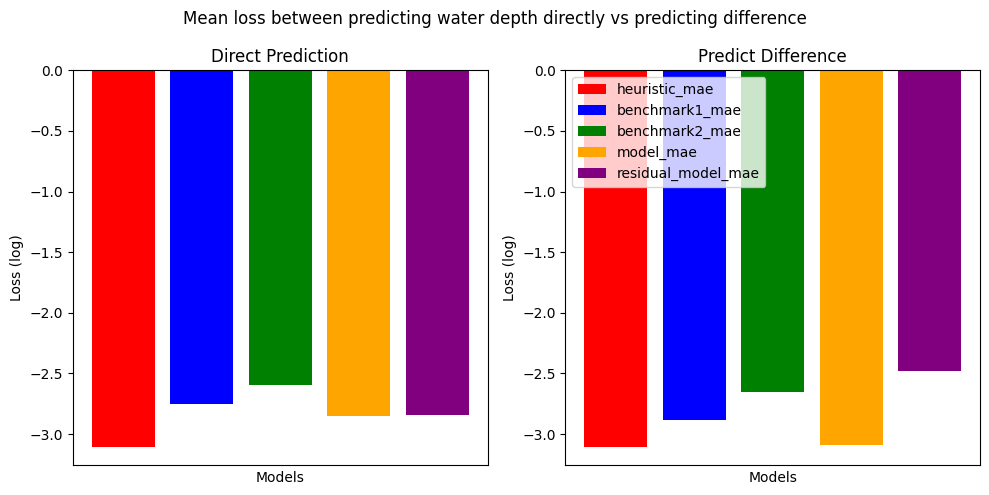

In [11]:

df_w_diff_list = []
error_wd_dif_list = ["_no_diff_train", "depthwise_diff_train"]
for er in error_wd_dif_list:
    df_w_diff_list.append(df_lr_epoch[df_lr_epoch['name'].str.contains(er)])

plt.figure(figsize=(10, 5))
plt.suptitle("Mean loss between predicting water depth directly vs predicting difference")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, 3)], df_w_diff_list, ["Direct Prediction", "Predict Difference"]):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(1, 2, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    # Rotate x-labels for better readability
    plt.xticks([])


plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()

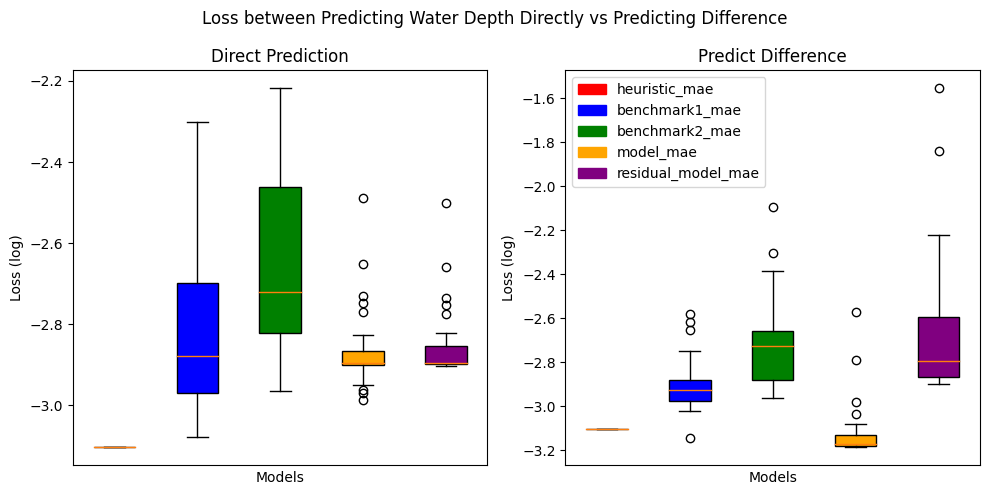

In [12]:
df_w_diff_list = []
error_wd_dif_list = ["_no_diff_train", "depthwise_diff_train"]
for er in error_wd_dif_list:
    df_w_diff_list.append(df_lr_epoch[df_lr_epoch['name'].str.contains(er)])

plt.figure(figsize=(10, 5))
plt.suptitle("Loss between Predicting Water Depth Directly vs Predicting Difference")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2], df_w_diff_list, ["Direct Prediction", "Predict Difference"]):
    df_logged = np.log10(df[column_names])
    plt.subplot(1, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, legend_labels, loc='upper left')

plt.tight_layout()

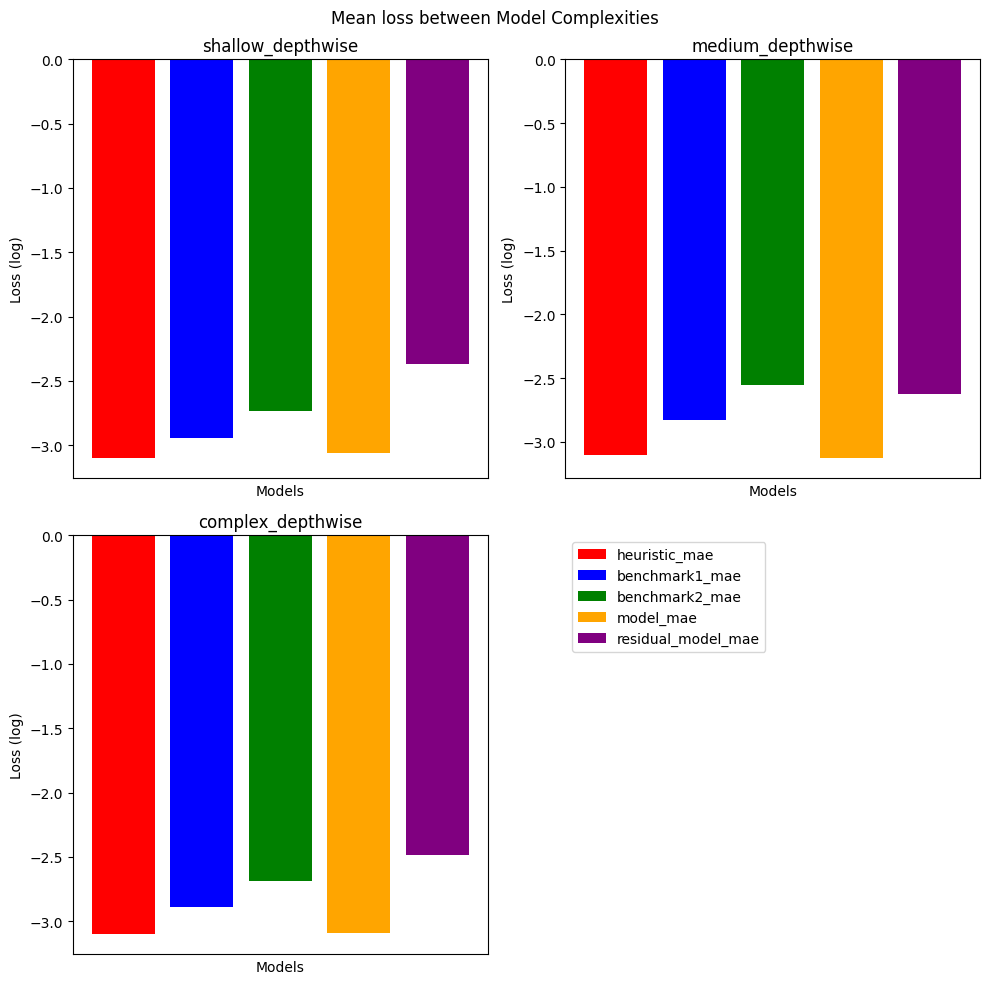

In [13]:
diff_df = df_lr_epoch[df_lr_epoch['name'].str.contains("depthwise_diff_train")]


df_w_diff_list = []
error_wd_dif_list = ["shallow_depthwise", "medium_depthwise", "complex_depthwise"]
for er in error_wd_dif_list:
    df_w_diff_list.append(diff_df[diff_df['name'].str.contains(er)])

plt.figure(figsize=(10, 10))
plt.suptitle("Mean loss between Model Complexities")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, 4)], df_w_diff_list, ["shallow_depthwise", "medium_depthwise", "complex_depthwise"]):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(2, 2, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    # Rotate x-labels for better readability
    plt.xticks([])

ax= plt.subplot(2,2,4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()

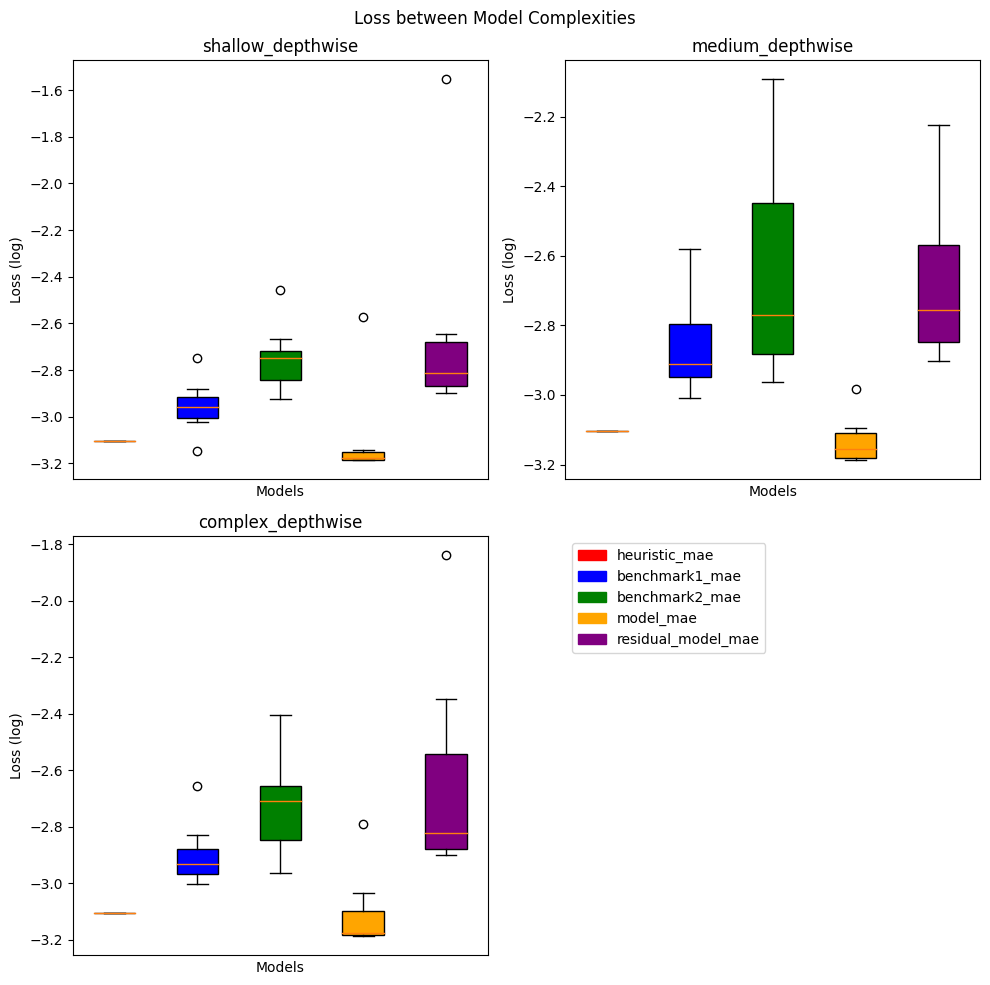

In [14]:
diff_df = df_lr_epoch[df_lr_epoch['name'].str.contains("depthwise_diff_train")]

df_w_diff_list = []
error_wd_dif_list = ["shallow_depthwise", "medium_depthwise", "complex_depthwise"]
for er in error_wd_dif_list:
    df_w_diff_list.append(diff_df[diff_df['name'].str.contains(er)])

plt.figure(figsize=(10, 10))
plt.suptitle("Loss between Model Complexities")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2, 3], df_w_diff_list, ["shallow_depthwise", "medium_depthwise", "complex_depthwise"]):
    df_logged = np.log10(df[column_names])
    plt.subplot(2, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

ax = plt.subplot(2, 2, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, legend_labels, loc='upper left')

plt.tight_layout()


### We determine that Medium is best by some slim margin so we progress

In [15]:
med_df = diff_df[diff_df['name'].str.contains("medium_depthwise")] # I think we just check between 2 epochs and 10 (or 20) not sure. Then take the best models and continue...

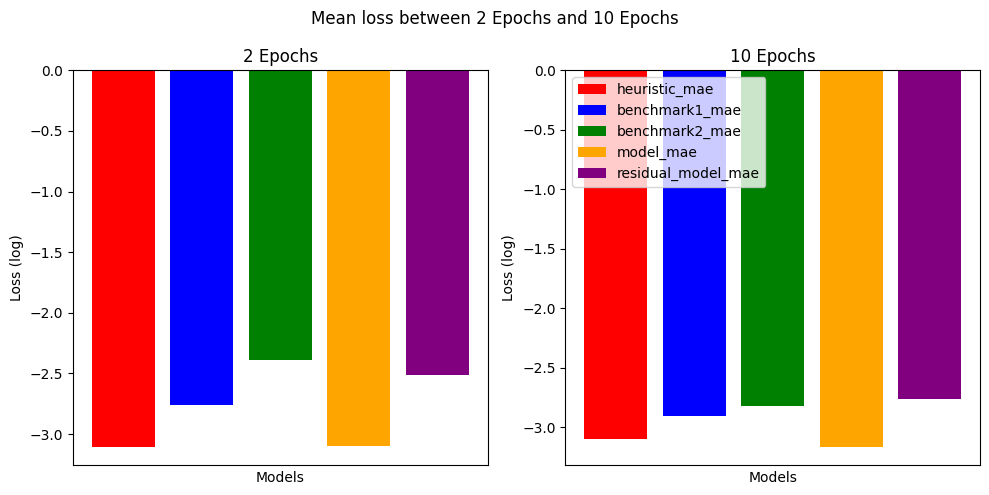

In [16]:
df_w_diff_list = [med_df[~med_df['name'].str.contains('_more_epochs_')], med_df[med_df['name'].str.contains('_more_epochs_')]]


plt.figure(figsize=(10, 5))
plt.suptitle("Mean loss between 2 Epochs and 10 Epochs")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, 3)], df_w_diff_list, ["2 Epochs", "10 Epochs"]):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(1, 2, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    plt.xticks([])


plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()

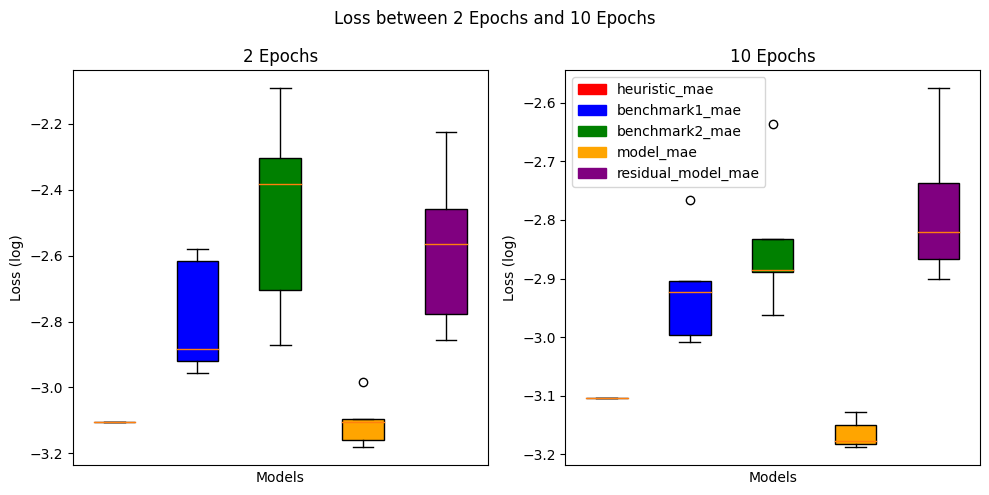

In [17]:
df_w_diff_list = [med_df[~med_df['name'].str.contains('_more_epochs_')], med_df[med_df['name'].str.contains('_more_epochs_')]]

plt.figure(figsize=(10, 5))
plt.suptitle("Loss between 2 Epochs and 10 Epochs")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2], df_w_diff_list, ["2 Epochs", "10 Epochs"]):
    df_logged = np.log10(df[column_names])
    plt.subplot(1, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, legend_labels, loc='upper left')

plt.tight_layout()

In [18]:
more_epochs_med_df = med_df[med_df['name'].str.contains('_more_epochs_')]
lr_list = ["1e-3", "1e-4", "2e-3", "1e-2", "5e-4"]

print(more_epochs_med_df.count())

name                  5
heuristic_mae         5
benchmark1_mae        5
benchmark2_mae        5
model_mae             5
residual_model_mae    5
dtype: int64


In [19]:
df_lr_list = []
for lr in lr_list:
    df_lr_list.append(more_epochs_med_df[more_epochs_med_df['name'].str.contains(lr)])

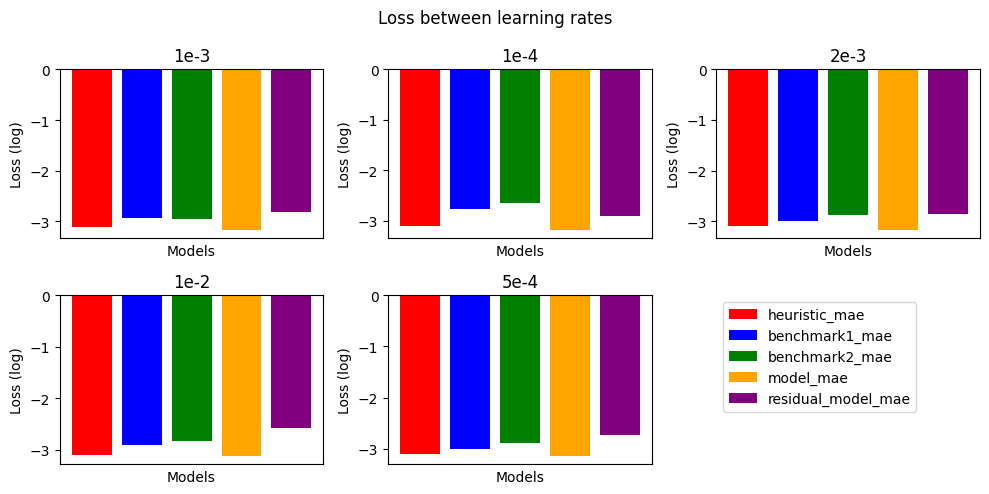

In [20]:
plt.figure(figsize=(10, 5))
plt.suptitle("Loss between learning rates")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, 6)], df_lr_list, lr_list):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(2, 3, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)
    # Rotate x-labels for better readability
    plt.xticks([])

ax= plt.subplot(2,3,6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()
plt.legend(bars_list, legend_labels, loc='upper left')
plt.tight_layout()

In [48]:
pd.set_option('display.max_colwidth', None)
names = ["1e-3", "2e-3", "1e-4", "1e-2", "5e-4"]
nice_error_df = more_epochs_med_df.copy()
nice_error_df['name'] = names

latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Final Results Learning rate with Medium Complexity', label='tab:lr',
                         position='h')

# Print the generated LaTeX code
print(latex_code)




\begin{table}[h]
\centering
\caption{Final Results Learning rate with Medium Complexity}
\label{tab:lr}
\begin{tabular}{p{2cm}ccccc}
\toprule
name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
1e-3 &       0.000787 &        0.001194 &        0.001092 &   0.000665 &            0.001510 \\
2e-3 &       0.000787 &        0.001010 &        0.001302 &   0.000658 &            0.001360 \\
1e-4 &       0.000787 &        0.001714 &        0.002307 &   0.000648 &            0.001254 \\
1e-2 &       0.000787 &        0.001246 &        0.001473 &   0.000744 &            0.002659 \\
5e-4 &       0.000787 &        0.000982 &        0.001290 &   0.000707 &            0.001836 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/43565690.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',


In [51]:
# p test
from scipy.stats import pearsonr

In [56]:
print(nice_error_df.head())
nice_error_df_transposed = nice_error_df.transpose(copy=True)
# nice_error_trans = nice_error_df_transposed[nice_error_df_transposed['name'].str.contains("model_mae")]
print(nice_error_df_transposed.head())
columns = nice_error_df_transposed.columns
print(columns)

    name  heuristic_mae  benchmark1_mae  benchmark2_mae  model_mae  \
31  1e-3       0.000787        0.001194        0.001092   0.000665   
37  2e-3       0.000787        0.001010        0.001302   0.000658   
43  1e-4       0.000787        0.001714        0.002307   0.000648   
49  1e-2       0.000787        0.001246        0.001473   0.000744   
55  5e-4       0.000787        0.000982        0.001290   0.000707   

    residual_model_mae  
31            0.001510  
37            0.001360  
43            0.001254  
49            0.002659  
55            0.001836  
                      31        37        43        49        55
name                1e-3      2e-3      1e-4      1e-2      5e-4
heuristic_mae   0.000787  0.000787  0.000787  0.000787  0.000787
benchmark1_mae  0.001194   0.00101  0.001714  0.001246  0.000982
benchmark2_mae  0.001092  0.001302  0.002307  0.001473   0.00129
model_mae       0.000665  0.000658  0.000648  0.000744  0.000707
Int64Index([31, 37, 43, 49, 55], dtype=

### Now we determine which weights performed the  is best

In [22]:
weight_df_list = []


weight_list = ["zw_09_nzw_01","zw_08_nzw_02", "zw_07_nzw_03", "zw_06_nzw_04", "zw_05_nzw_05", "zw_04_nzw_06"]
for er in weight_list:
    weight_df_list.append(df_weights_shuffle[df_weights_shuffle['name'].str.contains(er)])

# for df in weight_df_list:
    # print(df.count())

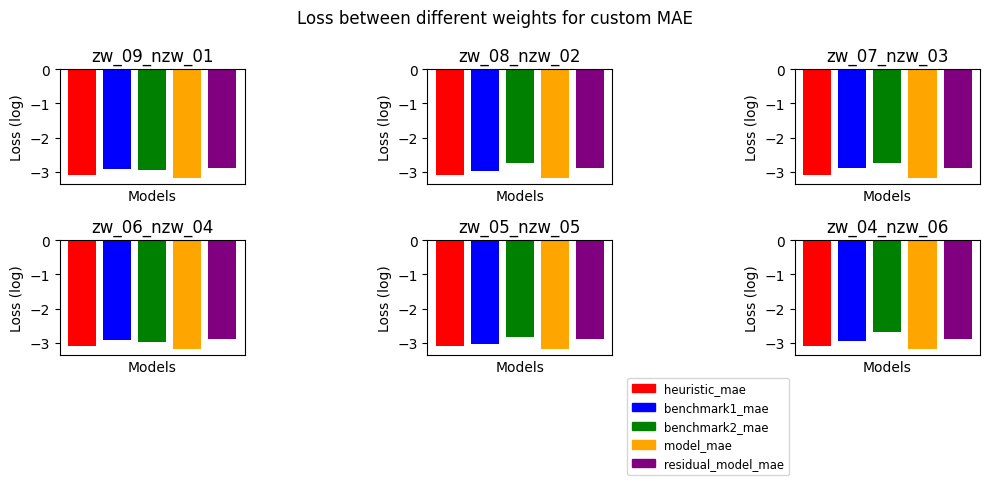

In [23]:
plt.figure(figsize=(10, 5))
plt.suptitle("Loss between different weights for custom MAE")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple'] 
legend_labels = [column for column in column_names]
bars_list = []
for i, df, dem in zip([i for i in range(1, 7)], weight_df_list, weight_list):

    mean_values = [df[column].mean() for column in column_names]
    plt.subplot(2, 3, i)
    bar= plt.bar(column_names, np.log10(mean_values), color=colors)

    bars_list.extend(bar)
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")

    plt.title(dem)

    plt.xticks([])

# ax= plt.subplot(2,3,6)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# plt.xticks([])
# plt.yticks([])
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))
plt.tight_layout()


In [24]:
better_names = ["09|01","08|02", "07|03", "06|04", "05|05", "04|06"]
nice_error_df = df_weights_shuffle[~df_weights_shuffle['name'].str.contains("shuffle")].copy()
nice_error_df['name'] = better_names 

latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The loss for different weightings in the MAE manuel loss function', label='tab:weights',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{The loss for different weightings in the MAE manuel loss function}
\label{tab:weights}
\begin{tabular}{p{2cm}ccccc}
\toprule
 name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
09|01 &       0.000787 &        0.001204 &        0.001137 &   0.000655 &            0.001322 \\
08|02 &       0.000787 &        0.001042 &        0.001830 &   0.000654 &            0.001335 \\
07|03 &       0.000787 &        0.001276 &        0.001845 &   0.000649 &            0.001267 \\
06|04 &       0.000787 &        0.001248 &        0.001051 &   0.000652 &            0.001302 \\
05|05 &       0.000787 &        0.000894 &        0.001517 &   0.000649 &            0.001260 \\
04|06 &       0.000787 &        0.001127 &        0.002029 &   0.000649 &            0.001263 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/2087474304.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',


### Shuffle vs no shuffle

In [25]:
# shuff_df_list = []


error_list = ["Shuffled", "Sequential"]
# for er in error_list:
#     shuff_df_list.append(df_weights_shuffle[df_weights_shuffle['name'].str.contains(er)])


# better_names = ["09|01","08|02", "07|03", "06|04", "05|05", "04|06"]
nice_error_df = df_weights_shuffle[df_weights_shuffle['name'].str.contains("shuffle")].copy()
# print(nice_error_df)
nice_error_df['name'] = ["Shuffled", "Sequential"] 

latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The loss for shuffled or not shuffled', label='tab:suffle',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{The loss for shuffled or not shuffled}
\label{tab:suffle}
\begin{tabular}{p{2cm}ccccc}
\toprule
      name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
  Shuffled &       0.000787 &        0.002165 &        0.001247 &   0.000648 &            0.001255 \\
Sequential &       0.000787 &        0.001578 &        0.001307 &   0.000649 &            0.001263 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/3757116938.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = nice_error_df.to_latex(index=False, column_format='p{2cm}ccccc',


### feature additions

- We look at .5 | .5  weighted MAE because for some reason this was the best performing model..

In [26]:
feature_names = ["normal_292", "rf_added", "masked_"]

learning_rates = ["weighted_1",
"weighted_2",
"weighted_3",
"weighted_4",
"weighted_5",
"weighted_6"]

df_wout_weight7 = df_rain_mask[~df_rain_mask['name'].str.contains("weighted_7")]

df_list_features = []
for er in feature_names:
    df_list_features.append(df_wout_weight7[df_wout_weight7['name'].str.contains(er)])

for df in df_list_features:
    print(df.count())

name                  7
heuristic_mae         7
benchmark1_mae        7
benchmark2_mae        7
model_mae             7
residual_model_mae    7
dtype: int64
name                  7
heuristic_mae         7
benchmark1_mae        7
benchmark2_mae        7
model_mae             7
residual_model_mae    7
dtype: int64
name                  7
heuristic_mae         7
benchmark1_mae        7
benchmark2_mae        7
model_mae             7
residual_model_mae    7
dtype: int64


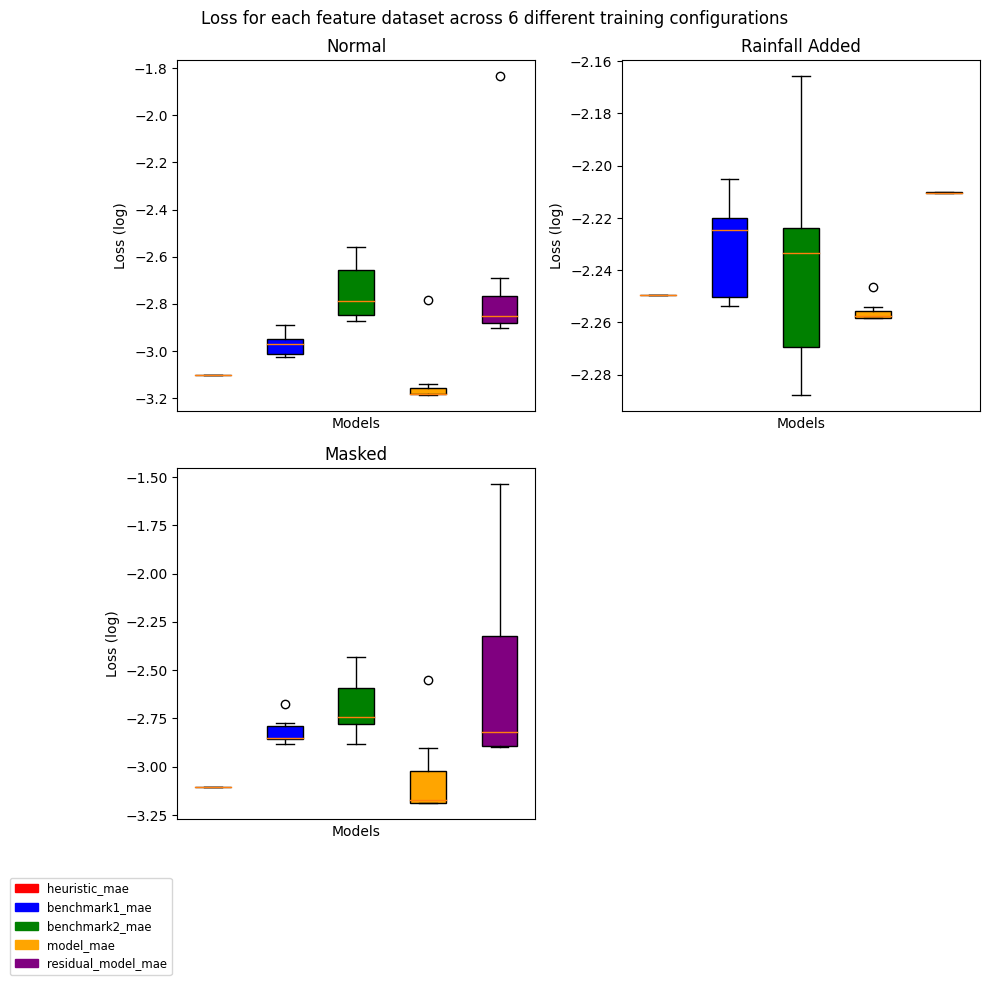

In [27]:
plt.figure(figsize=(10, 10))
plt.suptitle("Loss for each feature dataset across 6 different training configurations")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2, 3], df_list_features, ["Normal", "Rainfall Added", "Masked"]):
    df_logged = np.log10(df[column_names])
    plt.subplot(2, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))

plt.tight_layout()

In [28]:
feature_names = ["normal_292", "rf_added", "masked_"]

learning_rates_modified_weights = ["w11", "w12", "w13", "w21", "w22", "w23"]

new_names = []
df_wout_weight7 = df_rain_mask[~df_rain_mask['name'].str.contains("weighted_7")]
norm_df = df_wout_weight7[df_wout_weight7['name'].str.contains("normal_292")]  
norm_df = norm_df[~norm_df['name'].str.contains("shuffle")]


norm_df['name'] = learning_rates_modified_weights

latex_code = norm_df.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Six training configurations testing two different weights for MAE Manuel and three lr', label='tab:weighte_lr',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{Six training configurations testing two different weights for MAE Manuel and three lr}
\label{tab:weighte_lr}
\begin{tabular}{p{2cm}ccccc}
\toprule
name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
 w11 &       0.000787 &        0.001163 &        0.001336 &   0.000669 &            0.001453 \\
 w12 &       0.000787 &        0.000958 &        0.001636 &   0.000726 &            0.002032 \\
 w13 &       0.000787 &        0.001284 &        0.001447 &   0.000658 &            0.001350 \\
 w21 &       0.000787 &        0.001067 &        0.002772 &   0.001642 &            0.014677 \\
 w22 &       0.000787 &        0.000942 &        0.002398 &   0.000657 &            0.001403 \\
 w23 &       0.000787 &        0.000990 &        0.002026 &   0.000648 &            0.001255 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/3453461811.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = norm_df.to_latex(index=False, column_format='p{2cm}ccccc',


### Now we move on to the inception model

- We look at only a simple and medium deep model due to computational constraints
- look across weight 8, 9, 8
- and across the different feature datasets

In [29]:
df_inception_initial.count()

name                  18
heuristic_mae         18
benchmark1_mae        18
benchmark2_mae        18
model_mae             18
residual_model_mae    18
dtype: int64

In [30]:
incep_rf_df = df_inception_initial[df_inception_initial['name'].str.contains("_rf_added_")]
incep_norm_df = df_inception_initial[df_inception_initial['name'].str.contains("norm_independant_normal")]
incep_mask_df = df_inception_initial[df_inception_initial['name'].str.contains("masked")]

In [31]:
incep_norm_df.head()

,name,heuristic_mae,benchmark1_mae,benchmark2_mae,model_mae,residual_model_mae
0,simple_incep_train_5_custom_mae_weighted_8_norm_independant_normal_292,0.000787,0.000966,0.001179,0.000661,0.001437
1,medium_incep_train_5_custom_mae_weighted_8_norm_independant_normal_292,0.000787,0.001032,0.001054,0.000676,0.001655
2,simple_incep_train_5_custom_mae_weighted_9_norm_independant_normal_292,0.000787,0.001093,0.001247,0.000648,0.001272
3,medium_incep_train_5_custom_mae_weighted_9_norm_independant_normal_292,0.000787,0.001166,0.001064,0.000632,0.001418
4,simple_incep_train_5_custom_mae_weighted_10_norm_independant_normal_292,0.000787,0.001366,0.001146,0.000634,0.001396


### across all weights we look at complexity for nnormal normalization

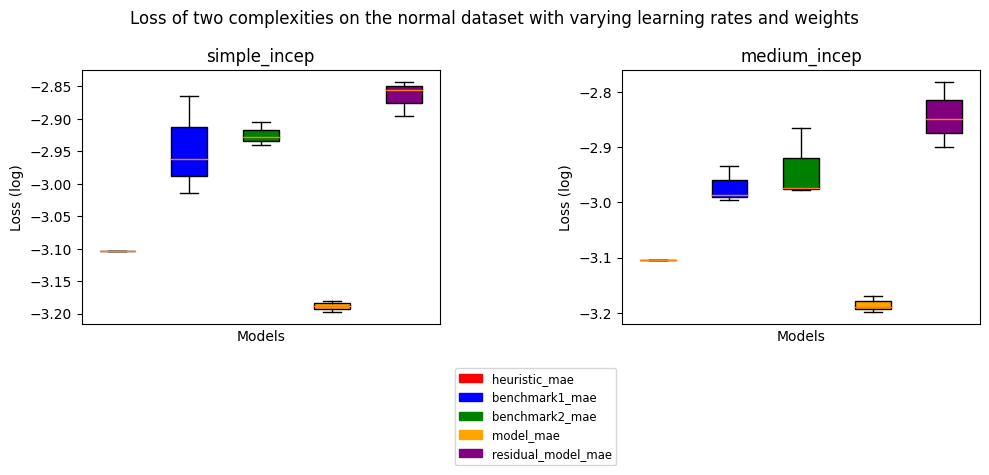

In [32]:
df_norm_list = []
names = ["simple_incep", "medium_incep"]
for n in names:
    df_norm_list.append(incep_norm_df[incep_norm_df['name'].str.contains(n)])

plt.figure(figsize=(10, 5))
plt.suptitle("Loss of two complexities on the normal dataset with varying learning rates and weights")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2], df_norm_list, names):
    df_logged = np.log10(df[column_names])
    plt.subplot(1, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))

plt.tight_layout()

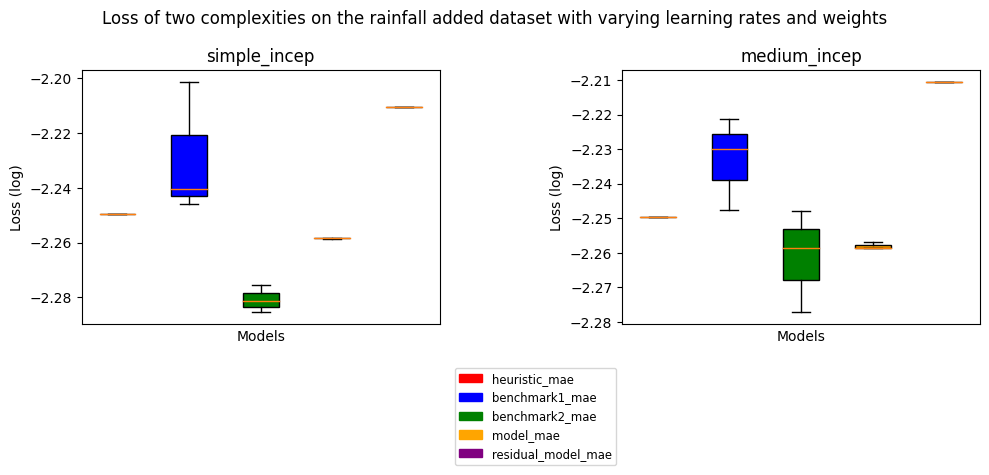

In [33]:
df_norm_list = []
names = ["simple_incep", "medium_incep"]
for n in names:
    df_norm_list.append(incep_rf_df[incep_rf_df['name'].str.contains(n)])

plt.figure(figsize=(10, 5))
plt.suptitle("Loss of two complexities on the rainfall added dataset with varying learning rates and weights")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2], df_norm_list, names):
    df_logged = np.log10(df[column_names])
    plt.subplot(1, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))

plt.tight_layout()

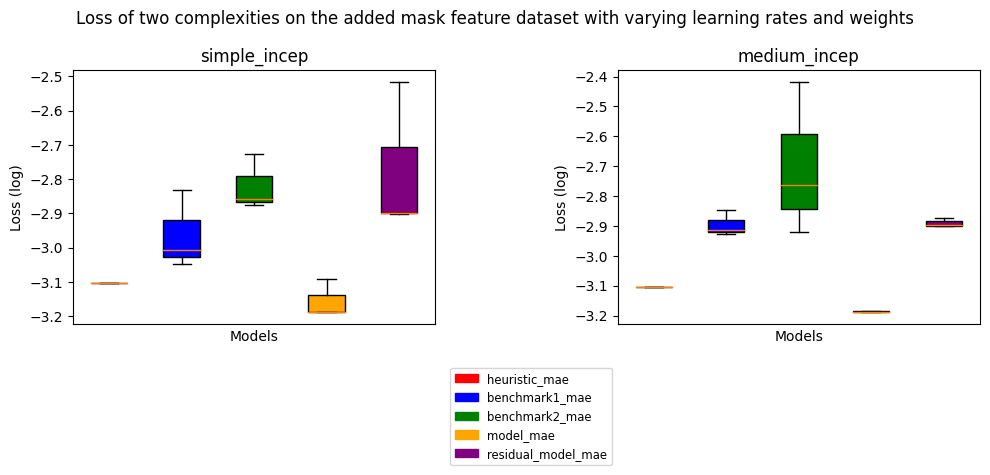

In [34]:
df_norm_list = []
names = ["simple_incep", "medium_incep"]
for n in names:
    df_norm_list.append(incep_mask_df[incep_mask_df['name'].str.contains(n)])

plt.figure(figsize=(10, 5))
plt.suptitle("Loss of two complexities on the added mask feature dataset with varying learning rates and weights")
column_names = df_initial.columns[1:]
colors = ['red', 'blue', 'green', 'orange', 'purple']
legend_labels = [column for column in column_names]
boxplots_list = []

for i, df, dem in zip([1, 2], df_norm_list, names):
    df_logged = np.log10(df[column_names])
    plt.subplot(1, 2, i)
    boxplot = plt.boxplot(df_logged, patch_artist=True)
    
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel("Loss (log)")
    plt.xlabel("Models")
    plt.title(dem)
    plt.xticks([])
    
    boxplots_list.append(boxplot)

# Create custom legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_patches, column_names, loc="best", fontsize='small', bbox_to_anchor=(0, -0.15))

plt.tight_layout()

### simple weights table

In [35]:
incep_rf_df = df_inception_initial[df_inception_initial['name'].str.contains("_rf_added_")]
incep_norm_df = df_inception_initial[df_inception_initial['name'].str.contains("norm_independant_normal")]
incep_mask_df = df_inception_initial[df_inception_initial['name'].str.contains("masked")]

## Instead of rewriting all the code again. I just change the 'str.contains' from "simple_incep" to "medium_incep" and regenerate the results

In [36]:
rf_df_simple = incep_rf_df[incep_rf_df['name'].str.contains("medium_incep")]
norm_df_simple = incep_norm_df[incep_norm_df['name'].str.contains("medium_incep")]
mask_df_simple = incep_mask_df[incep_mask_df['name'].str.contains("medium_incep")]

In [37]:
learning_rates_modified_weights = ["w1", "w2", "w3"]

norm_df_simple['name'] = learning_rates_modified_weights

latex_code = norm_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Three training configurations on the normal dataset for medium inception based model', label='tab:medium_normal',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{Three training configurations on the normal dataset for medium inception based model}
\label{tab:medium_normal}
\begin{tabular}{p{2cm}ccccc}
\toprule
name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
  w1 &       0.000787 &        0.001032 &        0.001054 &   0.000676 &            0.001655 \\
  w2 &       0.000787 &        0.001166 &        0.001064 &   0.000632 &            0.001418 \\
  w3 &       0.000787 &        0.001011 &        0.001362 &   0.000648 &            0.001258 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/857201834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df_simple['name'] = learning_rates_modified_weights
/tmp/ipykernel_16478/857201834.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = norm_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',


In [38]:
learning_rates_modified_weights = ["w1", "w2", "w3"]

rf_df_simple['name'] = learning_rates_modified_weights

latex_code = rf_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Three training configurations on the rainfall added dataset for medium inception based model', label='tab:medium_rf',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{Three training configurations on the rainfall added dataset for medium inception based model}
\label{tab:medium_rf}
\begin{tabular}{p{2cm}ccccc}
\toprule
name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
  w1 &       0.005629 &        0.005655 &        0.005513 &   0.005534 &            0.006159 \\
  w2 &       0.005629 &        0.006006 &        0.005282 &   0.005514 &            0.006160 \\
  w3 &       0.005629 &        0.005888 &        0.005650 &   0.005514 &            0.006160 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/3209853846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df_simple['name'] = learning_rates_modified_weights
/tmp/ipykernel_16478/3209853846.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = rf_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',


In [39]:
learning_rates_modified_weights = ["w1", "w2", "w3"]

mask_df_simple['name'] = learning_rates_modified_weights

latex_code = mask_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='Three training configurations on the mask added dataset for medium inception based model', label='tab:medium_mask',
                         position='h')

# Print the generated LaTeX code
print(latex_code)

\begin{table}[h]
\centering
\caption{Three training configurations on the mask added dataset for medium inception based model}
\label{tab:medium_mask}
\begin{tabular}{p{2cm}ccccc}
\toprule
name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
  w1 &       0.000787 &        0.001427 &        0.003831 &   0.000654 &            0.001342 \\
  w2 &       0.000787 &        0.001183 &        0.001719 &   0.000647 &            0.001254 \\
  w3 &       0.000787 &        0.001222 &        0.001197 &   0.000650 &            0.001267 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_16478/3855989085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_df_simple['name'] = learning_rates_modified_weights
/tmp/ipykernel_16478/3855989085.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = mask_df_simple.to_latex(index=False, column_format='p{2cm}ccccc',


# worst model:  initial_test_model_train_1_mse_all_normed_equal_26


# best model:  initial_test_model_train_1_mae_weighted_norm_independant_292

In [40]:
worst_model_indx = df['model_mae'].idxmax()
best_model_indx = df['model_mae'].idxmin()


print("worst model_res: ", df.loc[worst_model_indx, 'name'],'\n', "loss: ", df.loc[worst_model_indx, 'residual_model_mae'])
print("best model_res: ", df.loc[best_model_indx, 'name'], '\n', "loss: ", df.loc[best_model_indx, 'residual_model_mae'])


worst model_res:  medium_incep_train_5_custom_mae_weighted_8_norm_independant_masked_292 
 loss:  0.0013415804738371
best model_res:  medium_incep_train_5_custom_mae_weighted_9_norm_independant_masked_292 
 loss:  0.0012538075620761


In [41]:
print("worst model_res: ", df.loc[worst_model_indx, 'name'],'\n', "loss: ", df.loc[worst_model_indx, 'model_mae'])
print("best model_res: ", df.loc[best_model_indx, 'name'], '\n', "loss: ", df.loc[best_model_indx, 'model_mae'])

worst model_res:  medium_incep_train_5_custom_mae_weighted_8_norm_independant_masked_292 
 loss:  0.00065428525
best model_res:  medium_incep_train_5_custom_mae_weighted_9_norm_independant_masked_292 
 loss:  0.0006472916


In [42]:
print("Heuristc: ", df.loc[best_model_indx, 'name'], '\n', "loss: ", df.loc[best_model_indx, 'heuristic_mae'])

Heuristc:  medium_incep_train_5_custom_mae_weighted_9_norm_independant_masked_292 
 loss:  0.0007871811770475


## 10 epochs seemed to perform the best with the medium_depthwise_dff_model with 1e4 lr

Now we look across the board for the best and worst models in terms of model performance and residual loss

In [43]:
best5_single_step = df_concat.sort_values("model_mae").head(5)
best5_resid = df_concat.sort_values("residual_model_mae").head(5)

worst5_single_step = df_concat.sort_values("model_mae", ascending=False).head(5)
worst5_resid = df_concat.sort_values("residual_model_mae", ascending=False).head(5)

In [44]:
latex_code = best5_single_step.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The Top Five Models Across all Training SS', label='tab:best_ss',
                         position='h')
print(latex_code)

\begin{table}[h]
\centering
\caption{The Top Five Models Across all Training SS}
\label{tab:best_ss}
\begin{tabular}{p{2cm}ccccc}
\toprule
                                                                             name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
           medium\_incep\_train\_5\_custom\_mae\_weighted\_9\_norm\_independant\_normal\_292 &       0.000787 &        0.001166 &        0.001064 &   0.000632 &            0.001418 \\
          simple\_incep\_train\_5\_custom\_mae\_weighted\_10\_norm\_independant\_normal\_292 &       0.000787 &        0.001366 &        0.001146 &   0.000634 &            0.001396 \\
           medium\_incep\_train\_5\_custom\_mae\_weighted\_9\_norm\_independant\_masked\_292 &       0.000787 &        0.001183 &        0.001719 &   0.000647 &            0.001254 \\
          medium\_incep\_train\_5\_custom\_mae\_weighted\_10\_norm\_independant\_normal\_292 &       0.000787 &        0.

/tmp/ipykernel_16478/843859338.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = best5_single_step.to_latex(index=False, column_format='p{2cm}ccccc',


In [45]:
latex_code = best5_resid.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The Top Five Models Across all Training For Recurrent Steps', label='tab:best_r',
                         position='h')
print(latex_code)

\begin{table}[h]
\centering
\caption{The Top Five Models Across all Training For Recurrent Steps}
\label{tab:best_r}
\begin{tabular}{p{2cm}ccccc}
\toprule
                                                                                      name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
medium\_depthwise\_no\_diff\_train\_2\_custom\_mae\_weighted\_1e-4\_more\_epochs\_norm\_independant\_292 &       0.000787 &        0.001502 &        0.001632 &   0.001253 &            0.001253 \\
                   simple\_incep\_train\_5\_custom\_mae\_weighted\_10\_norm\_independant\_masked\_292 &       0.000787 &        0.000897 &        0.001878 &   0.000648 &            0.001253 \\
                    medium\_incep\_train\_5\_custom\_mae\_weighted\_9\_norm\_independant\_masked\_292 &       0.000787 &        0.001183 &        0.001719 &   0.000647 &            0.001254 \\
            medium\_depthwise\_no\_diff\_train\_2\_custom\_mae\_we

/tmp/ipykernel_16478/671611790.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = best5_resid.to_latex(index=False, column_format='p{2cm}ccccc',


In [46]:
latex_code = worst5_single_step.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The Worst Five Models Across all Training For SS', label='tab:worstss',
                         position='h')
print(latex_code)

\begin{table}[h]
\centering
\caption{The Worst Five Models Across all Training For SS}
\label{tab:worstss}
\begin{tabular}{p{2cm}ccccc}
\toprule
                                                        name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
          initial\_test\_model\_train\_1\_mse\_all\_normed\_equal\_26 &       0.002279 &       81.628900 &      106.629910 &  44.619150 &          648.459210 \\
 initial\_test\_model\_train\_1\_mse\_weighted\_all\_normed\_equal\_26 &       0.002279 &       78.769480 &      111.990715 &  32.265385 &          379.157455 \\
         initial\_test\_model\_train\_1\_mse\_all\_normed\_equal\_819 &       0.002551 &       14.399827 &       25.591928 &  16.135822 &          187.824300 \\
initial\_test\_model\_train\_1\_mse\_weighted\_all\_normed\_equal\_819 &       0.002551 &       21.657652 &       24.267190 &   8.066945 &          101.351124 \\
    initial\_test\_model\_train\_1\_mse\_a

/tmp/ipykernel_16478/604573370.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = worst5_single_step.to_latex(index=False, column_format='p{2cm}ccccc',


In [47]:
latex_code = worst5_resid.to_latex(index=False, column_format='p{2cm}ccccc',
                         caption='The Worst Five Models Across all Training For Recurrent Steps', label='tab:worstr',
                         position='h')
print(latex_code)

\begin{table}[h]
\centering
\caption{The Worst Five Models Across all Training For Recurrent Steps}
\label{tab:worstr}
\begin{tabular}{p{2cm}ccccc}
\toprule
                                                       name &  heuristic\_mae &  benchmark1\_mae &  benchmark2\_mae &  model\_mae &  residual\_model\_mae \\
\midrule
         initial\_test\_model\_train\_1\_mse\_all\_normed\_equal\_26 &       0.002279 &       81.628900 &      106.629910 &  44.619150 &          648.459210 \\
initial\_test\_model\_train\_1\_mse\_weighted\_all\_normed\_equal\_26 &       0.002279 &       78.769480 &      111.990715 &  32.265385 &          379.157455 \\
        initial\_test\_model\_train\_1\_mse\_all\_normed\_equal\_819 &       0.002551 &       14.399827 &       25.591928 &  16.135822 &          187.824300 \\
   initial\_test\_model\_train\_1\_mae\_auto\_all\_normed\_equal\_292 &       0.002440 &        4.586013 &       38.804940 &   4.971159 &          164.466783 \\
   initial\_test\_model\_train\_1\_

/tmp/ipykernel_16478/3441075313.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = worst5_resid.to_latex(index=False, column_format='p{2cm}ccccc',
